# **UNIVERSITY OF NEW HAVEN**

## **NATURAL LANGUAGE PROCESSING**

## **SENTIMENT ANALYSIS OF US AIRLINES**

**Load and Explore the Dataset**

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'Tweets.csv'  # Replace this with the correct file path if different
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 Rows of the Dataset:")
print(data.head())

# Display basic information about the dataset
print("\nDataset Information:")
print(data.info())

# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


First 5 Rows of the Dataset:
             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1  

**Data Cleaning and Preprocessing**

In [ ]:
import re

# Display dataset columns for reference
print("Columns in the Dataset:", data.columns)

# Key columns: 'text' (tweets), 'airline_sentiment' (sentiment), and optionally 'airline'
# Rename columns for consistency if needed
data.rename(columns={'text': 'tweet', 'airline_sentiment': 'sentiment'}, inplace=True)

# Drop unnecessary columns (if any)
columns_to_drop = ['tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone']  # Adjust based on dataset
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns], errors='ignore')

# Fill missing values in 'tweet' with empty strings
data['tweet'] = data['tweet'].fillna("")

# Clean text in tweets
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning to the tweet column
data['cleaned_tweet'] = data['tweet'].apply(clean_text)

# Check sentiment distribution
print("\nSentiment Distribution:")
print(data['sentiment'].value_counts())

# Display cleaned dataset
print("\nCleaned Dataset Sample:")
print(data[['cleaned_tweet', 'sentiment']].head())


Columns in the Dataset: Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

Sentiment Distribution:
sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

Cleaned Dataset Sample:
                                       cleaned_tweet sentiment
0                                          what said   neutral
1  plus youve added commercials to the experience...  positive
2  i didnt today must mean i need to take another...   neutral
3  its really aggressive to blast obnoxious enter...  negative
4            and its a really big bad thing about it  negative


**Visualize Sentiment Distribution**

<ipython-input-6-0e4370dbc9e3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette="viridis")


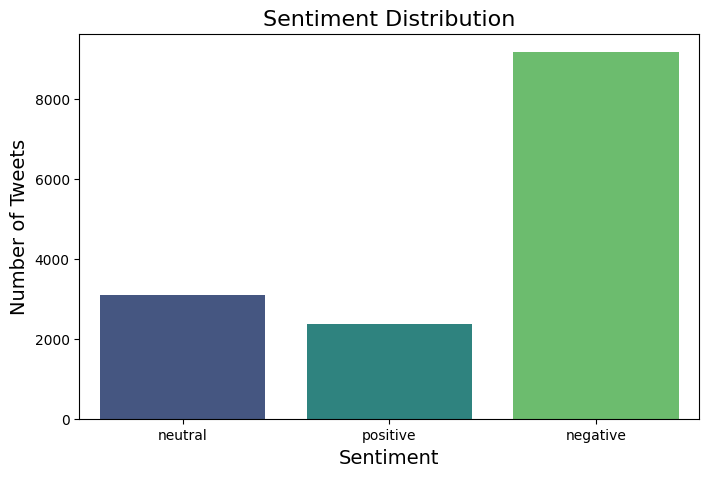

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=data, palette="viridis")
plt.title("Sentiment Distribution", fontsize=16)
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Number of Tweets", fontsize=14)
plt.show()


**Count Tweets for Each Airline**

Number of Tweets for Each Airline:
airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64


<ipython-input-7-5f9ecaf8da92>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_tweet_counts.index, y=airline_tweet_counts.values, palette="viridis")


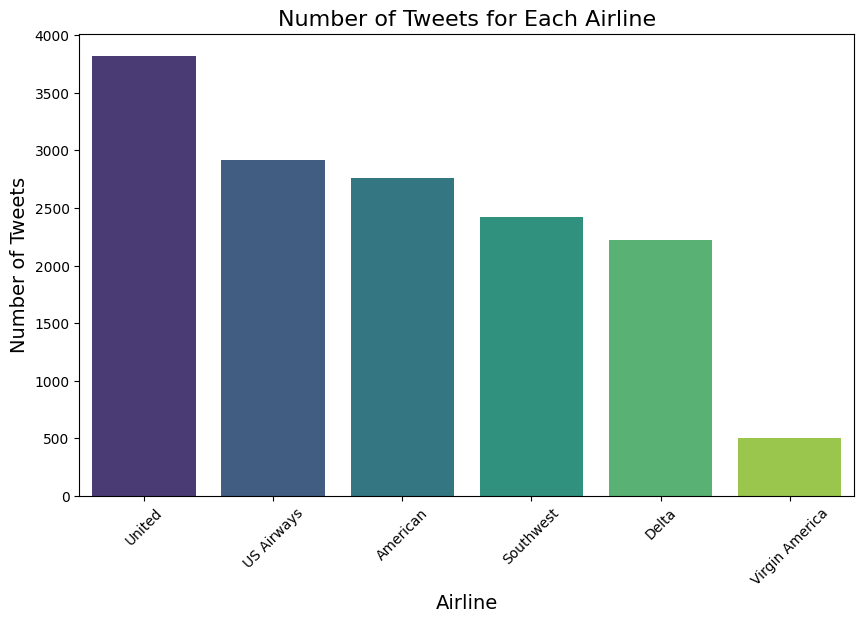

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'airline' column exists and is not null
if 'airline' in data.columns:
    # Count the number of tweets for each airline
    airline_tweet_counts = data['airline'].value_counts()

    # Display the counts
    print("Number of Tweets for Each Airline:")
    print(airline_tweet_counts)

    # Visualize the counts
    plt.figure(figsize=(10, 6))
    sns.barplot(x=airline_tweet_counts.index, y=airline_tweet_counts.values, palette="viridis")
    plt.title("Number of Tweets for Each Airline", fontsize=16)
    plt.xlabel("Airline", fontsize=14)
    plt.ylabel("Number of Tweets", fontsize=14)
    plt.xticks(rotation=45)
    plt.show()
else:
    print("The dataset does not contain an 'airline' column.")


**Number of Negative Tweets for Each Airline**

Number of Negative Tweets for Each Airline:
airline
United            2633
US Airways        2263
American          1960
Southwest         1186
Delta              955
Virgin America     181
Name: count, dtype: int64


<ipython-input-8-aa826bf2c23f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=negative_counts.index, y=negative_counts.values, palette="Reds")


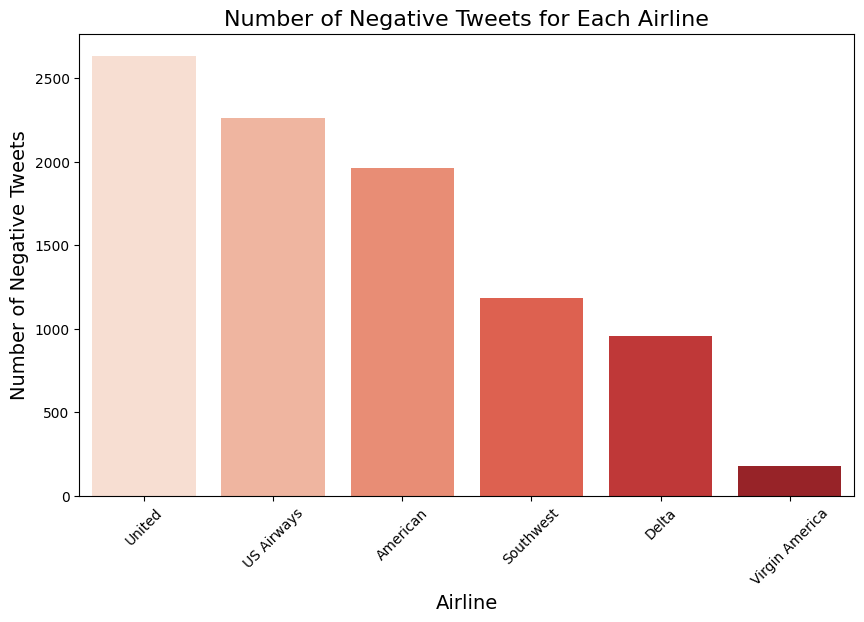

In [ ]:
# Filter negative tweets
negative_tweets = data[data['sentiment'] == 'negative']

# Check the number of negative tweets per airline
negative_counts = negative_tweets['airline'].value_counts()

# Display negative tweet counts by airline
print("Number of Negative Tweets for Each Airline:")
print(negative_counts)

# Visualize negative tweets by airline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=negative_counts.index, y=negative_counts.values, palette="Reds")
plt.title("Number of Negative Tweets for Each Airline", fontsize=16)
plt.xlabel("Airline", fontsize=14)
plt.ylabel("Number of Negative Tweets", fontsize=14)
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

# Combine all negative tweets for each airline
airline_reasons = {}
for airline in negative_tweets['airline'].unique():
    airline_data = negative_tweets[negative_tweets['airline'] == airline]
    text = ' '.join(airline_data['cleaned_tweet'])
    airline_reasons[airline] = text

# Extract frequent words or phrases
for airline, text in airline_reasons.items():
    print(f"\nTop Words for Negative Tweets - {airline}:")
    words = text.split()
    common_words = Counter(words).most_common(10)  # Top 10 words
    for word, count in common_words:
        print(f"{word}: {count}")



Top Words for Negative Tweets - Virgin America:
to: 119
i: 80
a: 74
the: 67
flight: 58
on: 55
my: 54
you: 51
and: 50
is: 50

Top Words for Negative Tweets - United:
to: 1638
the: 1243
i: 968
a: 964
and: 784
you: 781
flight: 774
for: 702
my: 694
on: 687

Top Words for Negative Tweets - Southwest:
to: 764
the: 514
i: 470
flight: 402
for: 402
a: 398
on: 375
my: 342
and: 342
you: 298

Top Words for Negative Tweets - Delta:
to: 572
the: 446
i: 363
flight: 322
a: 310
on: 273
and: 250
is: 234
for: 224
my: 222

Top Words for Negative Tweets - US Airways:
to: 1568
the: 982
i: 865
on: 792
a: 778
for: 750
flight: 727
and: 724
you: 605
my: 578

Top Words for Negative Tweets - American:
to: 1380
the: 856
i: 848
a: 679
and: 658
flight: 617
for: 586
on: 585
you: 575
my: 506


Reasons Of Negative Tweets:
negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64


<ipython-input-10-ac17080a5a00>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='negativereason', data=data, palette='hls')


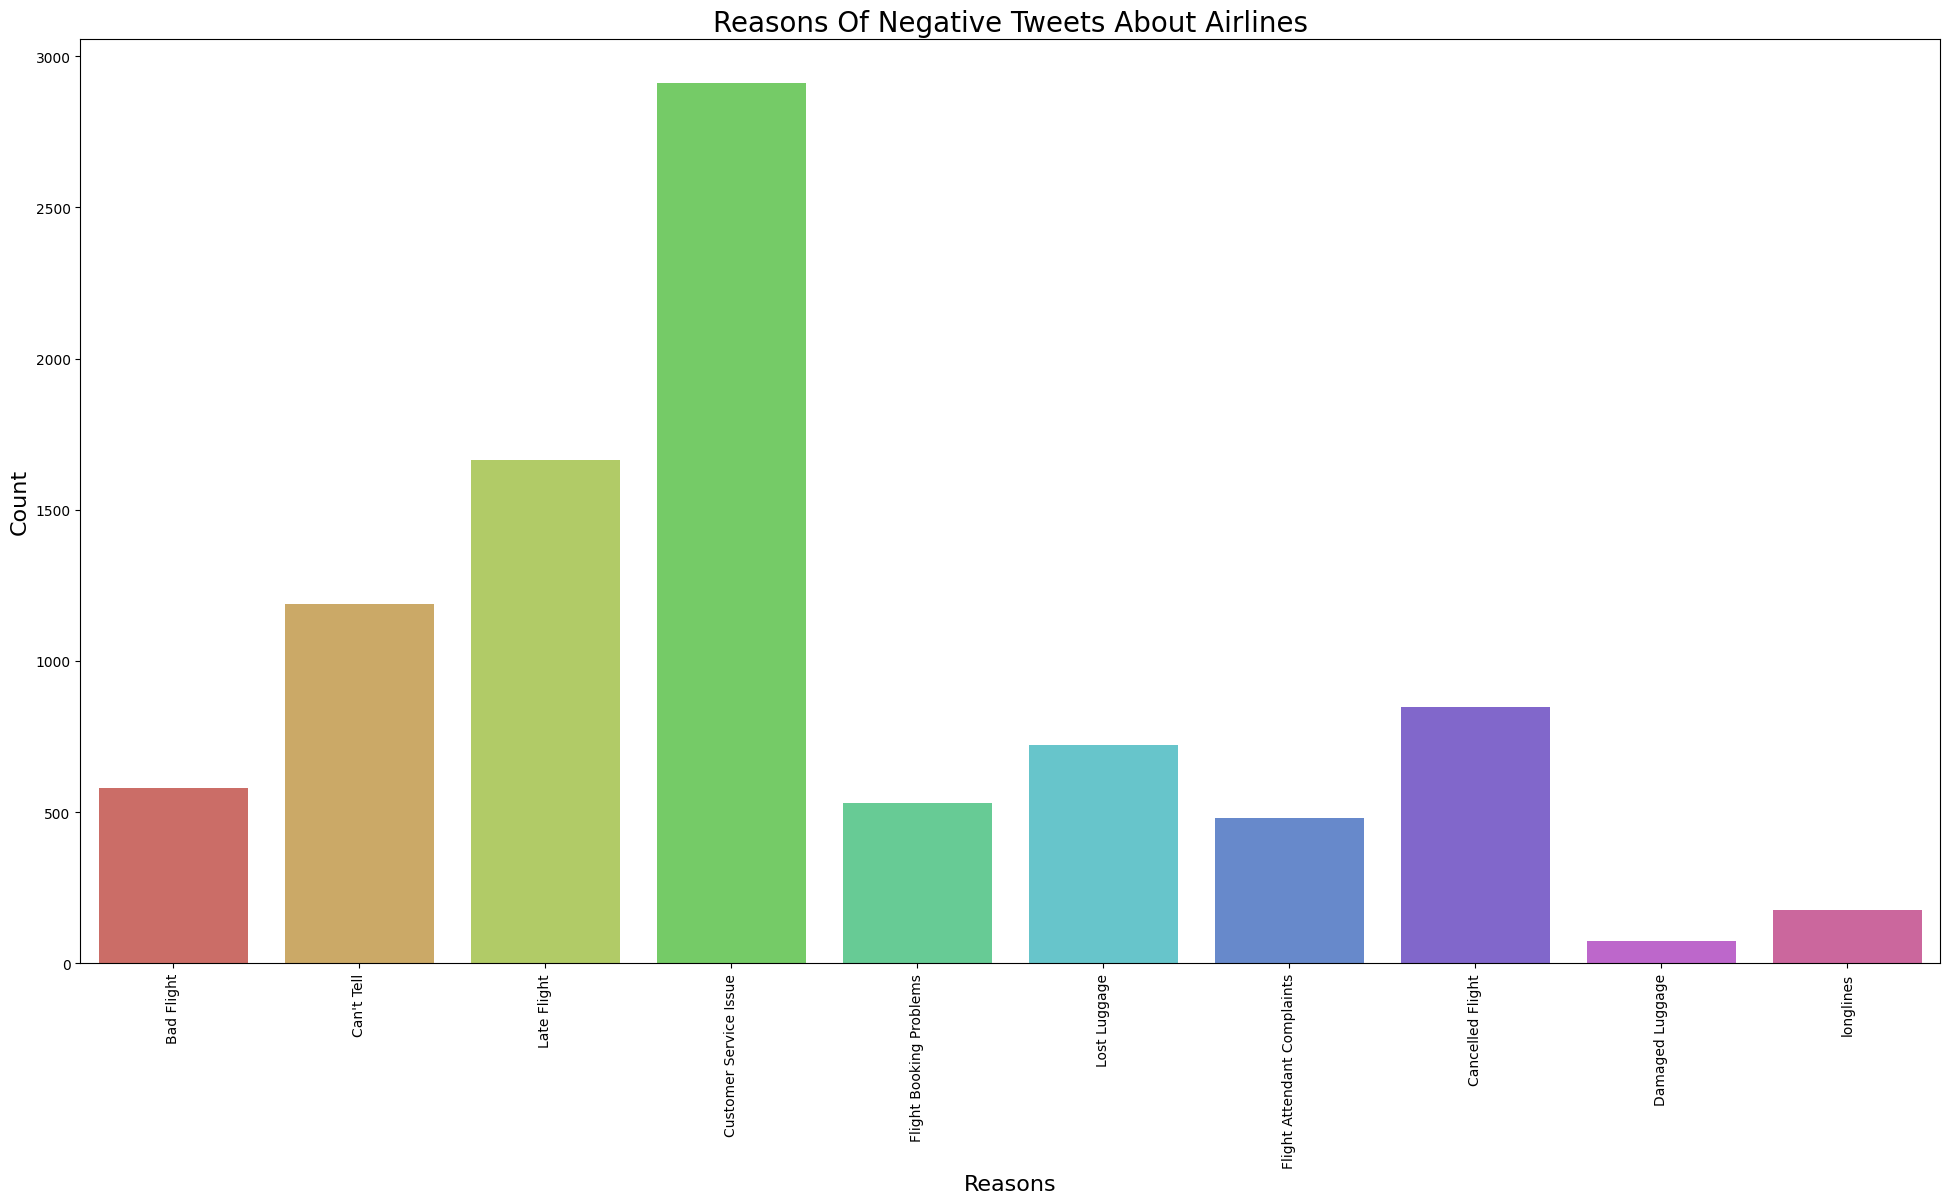

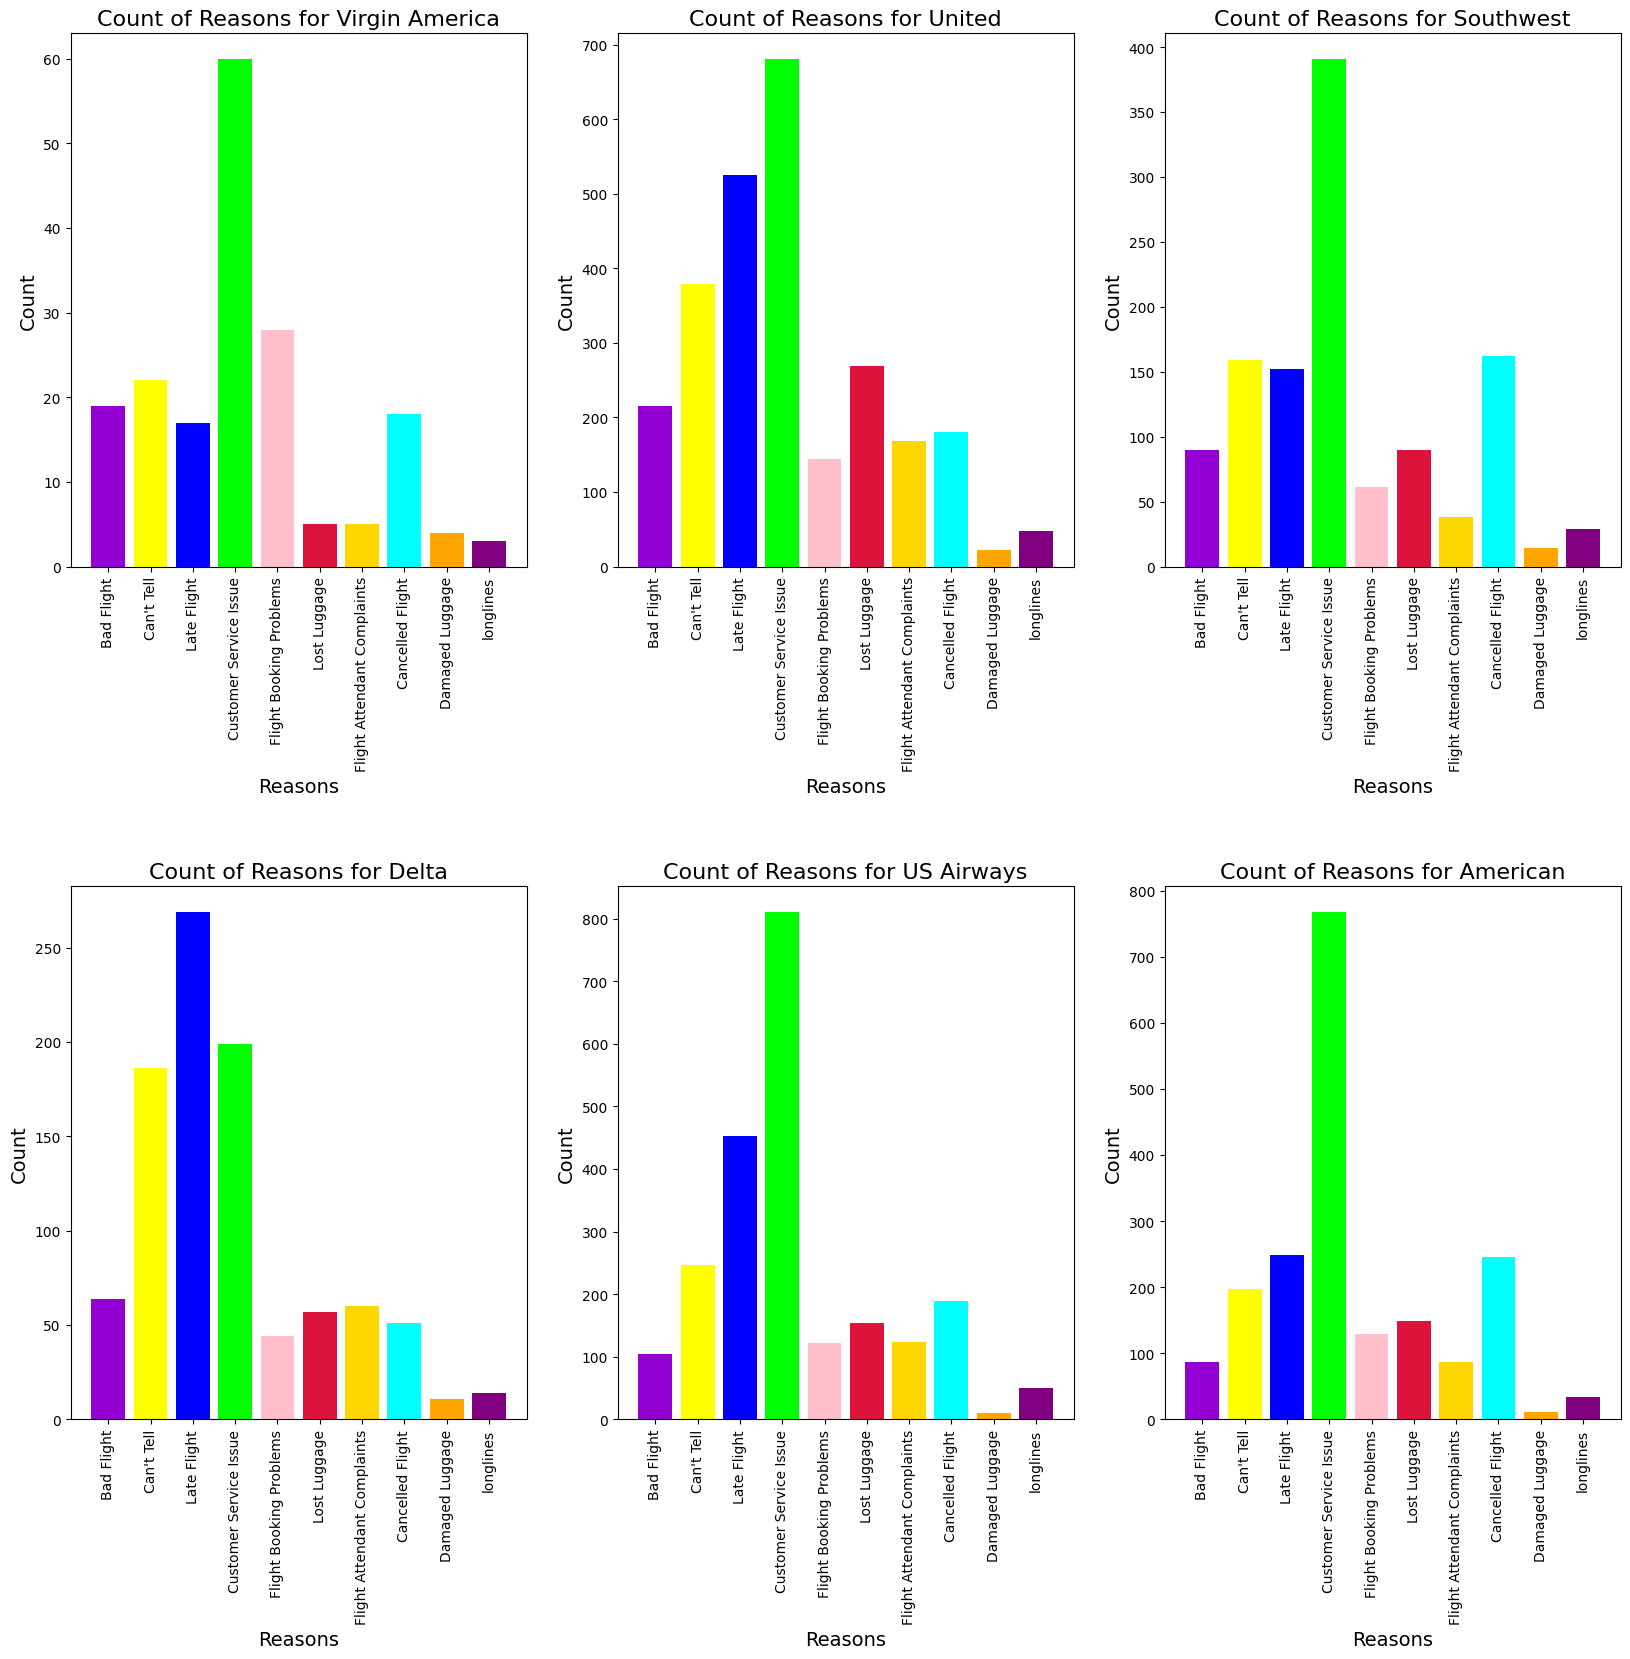

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import cprint

# Ensure necessary columns are available
if 'negativereason' in data.columns and 'airline' in data.columns:
    # Print overall reasons for negative tweets
    cprint('Reasons Of Negative Tweets:', 'green')
    print(data['negativereason'].value_counts())

    # Plot overall reasons for negative tweets
    plt.figure(figsize=(24, 12))
    sns.countplot(x='negativereason', data=data, palette='hls')
    plt.title('Reasons Of Negative Tweets About Airlines', fontsize=20)
    plt.xlabel('Reasons', fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.xticks(rotation=90)
    plt.show()

    # Function to count negative reasons for a specific airline
    def NCount(Airline):
        airline_data = data[data['airline'] == Airline]
        count = airline_data['negativereason'].value_counts()
        unique_reasons = data['negativereason'].dropna().unique()
        Reason_frame = pd.DataFrame({'Reasons': unique_reasons})
        Reason_frame['Count'] = Reason_frame['Reasons'].apply(lambda x: count.get(x, 0))
        return Reason_frame

    # Function to plot reasons for negative tweets for a specific airline
    def Plot_Reason(Airline):
        reason_data = NCount(Airline)
        counts = reason_data['Count']
        ids = range(1, len(reason_data) + 1)
        plt.bar(ids, counts, color=['darkviolet', 'yellow', 'blue', 'lime', 'pink',
                                    'crimson', 'gold', 'cyan', 'orange', 'purple'])
        plt.xticks(ids, reason_data['Reasons'], rotation=90)
        plt.title(f'Count of Reasons for {Airline}', fontsize=16)
        plt.xlabel('Reasons', fontsize=14)
        plt.ylabel('Count', fontsize=14)

    # List of airlines in the dataset
    airlines = data['airline'].dropna().unique()

    # Plot reasons for all airlines
    plt.figure(figsize=(20, 18))
    for i, airline in enumerate(airlines):
        plt.subplot(2, 3, i + 1)  # Adjust grid size if needed
        plt.subplots_adjust(hspace=0.6)
        Plot_Reason(airline)
    plt.show()
else:
    print("The dataset does not contain the required 'negativereason' or 'airline' columns.")


In [ ]:
!pip install nltk


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Clean text function
def clean_text_advanced(text):
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    words = text.split()
    # Remove stopwords and lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Rejoin words into a single string
    text = ' '.join(words)
    return text

# Apply the advanced cleaning function
data['cleaned_tweet'] = data['tweet'].apply(clean_text_advanced)

# Display a sample of cleaned tweets
print(data[['tweet', 'cleaned_tweet']].head())


                                               tweet  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                       cleaned_tweet  
0                                               said  
1       plus youve added commercial experience tacky  
2       didnt today must mean need take another trip  
3  really aggressive blast obnoxious entertainmen...  
4                               really big bad thing  


**Word Cloud for Positive Sentiment**

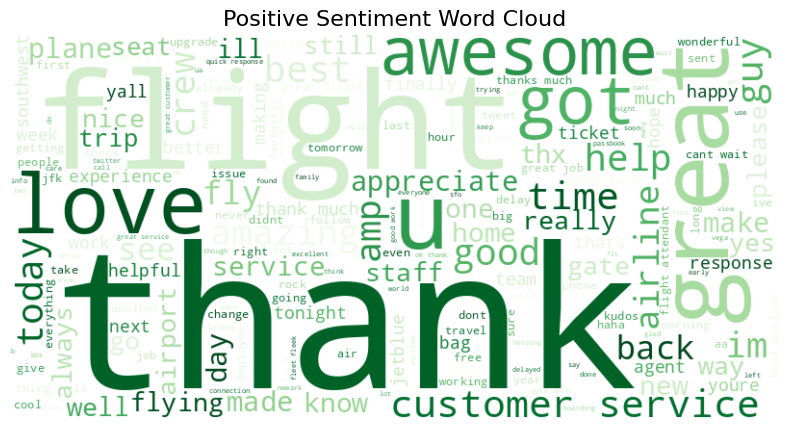

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter positive tweets
positive_tweets = data[data['sentiment'] == 'positive']['cleaned_tweet']

# Combine all positive tweets into a single string
positive_text = ' '.join(positive_tweets.dropna())

# Generate word cloud
positive_wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud', fontsize=16)
plt.show()


**Word Cloud for Negative Sentiment**

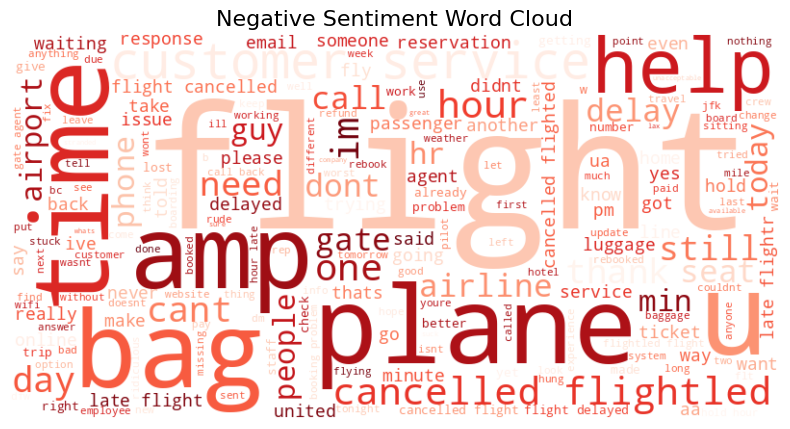

In [ ]:
# Filter negative tweets
negative_tweets = data[data['sentiment'] == 'negative']['cleaned_tweet']

# Combine all negative tweets into a single string
negative_text = ' '.join(negative_tweets.dropna())

# Generate word cloud
negative_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud', fontsize=16)
plt.show()


**Word Cloud for Neutral Sentiment**

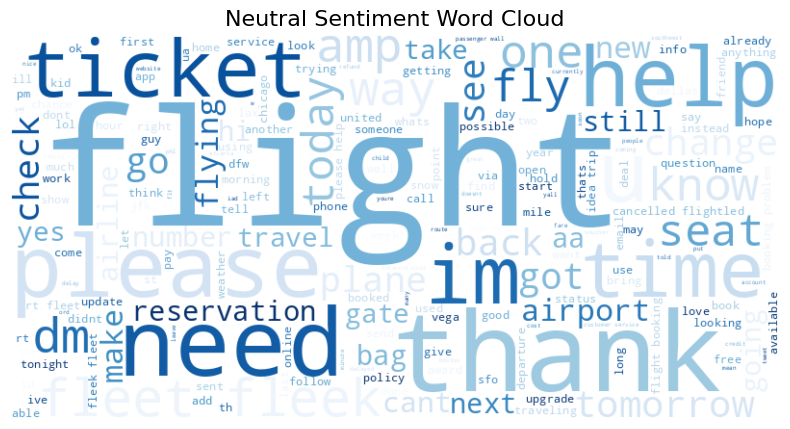

In [ ]:
# Filter neutral tweets
neutral_tweets = data[data['sentiment'] == 'neutral']['cleaned_tweet']

# Combine all neutral tweets into a single string
neutral_text = ' '.join(neutral_tweets.dropna())

# Generate word cloud
neutral_wc = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(neutral_text)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(neutral_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Sentiment Word Cloud', fontsize=16)
plt.show()


In [ ]:
!pip install transformers datasets torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


**Tokenization**

In [ ]:
from transformers import AutoTokenizer

# Load BERT tokenizer
bert_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the dataset for BERT
data['bert_tokens'] = data['cleaned_tweet'].apply(lambda x: bert_tokenizer.encode(x, max_length=128, truncation=True, padding="max_length"))

# Load RoBERTa tokenizer
roberta_tokenizer = AutoTokenizer.from_pretrained("roberta-base")

# Tokenize the dataset for RoBERTa
data['roberta_tokens'] = data['cleaned_tweet'].apply(lambda x: roberta_tokenizer.encode(x, max_length=128, truncation=True, padding="max_length"))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

**Prepare the Dataset for Training**

In [ ]:
from sklearn.model_selection import train_test_split
import torch

# Map sentiment labels to numerical values
label_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}
data['sentiment_label'] = data['sentiment'].map(label_mapping)

# Split the dataset
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Convert to PyTorch datasets
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, tokens, labels):
        self.tokens = tokens
        self.labels = labels

    def __len__(self):
        return len(self.tokens)

    def __getitem__(self, idx):
        return {
            "input_ids": torch.tensor(self.tokens[idx], dtype=torch.long),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long),
        }

bert_train_dataset = SentimentDataset(train_data['bert_tokens'].tolist(), train_data['sentiment_label'].tolist())
bert_test_dataset = SentimentDataset(test_data['bert_tokens'].tolist(), test_data['sentiment_label'].tolist())

roberta_train_dataset = SentimentDataset(train_data['roberta_tokens'].tolist(), train_data['sentiment_label'].tolist())
roberta_test_dataset = SentimentDataset(test_data['roberta_tokens'].tolist(), test_data['sentiment_label'].tolist())


**Fine tune BERT model**

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
bert_model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

# Split dataset into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    data['cleaned_tweet'].tolist(),
    data['sentiment_label'].tolist(),
    test_size=0.2,
    random_state=42
)

# Define the Dataset class
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=self.max_len,
            return_tensors="pt"
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(),
            "attention_mask": encoding["attention_mask"].squeeze(),
            "labels": torch.tensor(label, dtype=torch.long),
        }

# Create PyTorch datasets
max_len = 128
train_dataset = SentimentDataset(train_texts, train_labels, tokenizer, max_len)
test_dataset = SentimentDataset(test_texts, test_labels, tokenizer, max_len)

# Define compute_metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    accuracy = accuracy_score(labels, predictions)
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

# Define training arguments
training_args = TrainingArguments(
    output_dir="./bert_results",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,  # Adjust as needed
    weight_decay=0.01,
    logging_dir="./bert_logs",
    load_best_model_at_end=True,
    logging_steps=10,
    report_to="none",  # Disable W&B
    gradient_accumulation_steps=2,
    fp16=True  # Mixed precision training
)

# Create Trainer with compute_metrics
trainer = Trainer(
    model=bert_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics  # Add compute_metrics function here
)

# Train the model
trainer.train()

# Evaluate the model
bert_results = trainer.evaluate()
print("BERT Evaluation Results:", bert_results)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-37-75d34758ff7f>:78: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.543500,0.505724,0.794399,0.799609,0.794399,0.796499
2,0.388900,0.491552,0.808743,0.803580,0.808743,0.805418


BERT Evaluation Results: {'eval_loss': 0.4915519654750824, 'eval_accuracy': 0.8087431693989071, 'eval_precision': 0.8035803417661866, 'eval_recall': 0.8087431693989071, 'eval_f1': 0.8054176183568038, 'eval_runtime': 6.3321, 'eval_samples_per_second': 462.402, 'eval_steps_per_second': 28.9, 'epoch': 2.0}


**Fine-Tune RoBERTa**

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load RoBERTa tokenizer and model
roberta_tokenizer = AutoTokenizer.from_pretrained("roberta-base")
roberta_model = AutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=3)

# Define compute_metrics function for evaluation
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    accuracy = accuracy_score(labels, predictions)
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

# Training arguments for RoBERTa
roberta_training_args = TrainingArguments(
    output_dir="./roberta_results",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,  # Reduced epochs for quicker testing
    weight_decay=0.01,
    logging_dir="./roberta_logs",
    load_best_model_at_end=True,
    logging_steps=10,
    report_to="none",  # Disable W&B
    gradient_accumulation_steps=2,
    fp16=True,
)

# Create Trainer for RoBERTa with compute_metrics
roberta_trainer = Trainer(
    model=roberta_model,
    args=roberta_training_args,
    train_dataset=train_dataset,  # Use train_dataset from BERT setup
    eval_dataset=test_dataset,    # Use test_dataset from BERT setup
    tokenizer=roberta_tokenizer,
    compute_metrics=compute_metrics  # Add metrics function
)

# Train the RoBERTa model
roberta_trainer.train()

# Evaluate the RoBERTa model
roberta_results = roberta_trainer.evaluate()
print("RoBERTa Evaluation Results:", roberta_results)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-38-ca7119f9fab7>:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  roberta_trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.744700,0.713423,0.709016,0.708026,0.709016,0.701242
2,0.657500,0.662247,0.732923,0.713350,0.732923,0.716190


RoBERTa Evaluation Results: {'eval_loss': 0.6622465252876282, 'eval_accuracy': 0.7329234972677595, 'eval_precision': 0.7133501117138823, 'eval_recall': 0.7329234972677595, 'eval_f1': 0.7161896653477344, 'eval_runtime': 6.4223, 'eval_samples_per_second': 455.911, 'eval_steps_per_second': 28.494, 'epoch': 2.0}


In [ ]:
# Provided Evaluation Results
bert_results = {
    'eval_loss': 0.4915519654750824,
    'eval_accuracy': 0.8087431693989071,
    'eval_precision': 0.8035803417661866,
    'eval_recall': 0.8087431693989071,
    'eval_f1': 0.8054176183568038,
    'eval_runtime': 6.3321,
    'eval_samples_per_second': 462.402,
    'eval_steps_per_second': 28.9
}

roberta_results = {
    'eval_loss': 0.6622465252876282,
    'eval_accuracy': 0.7329234972677595,
    'eval_precision': 0.7133501117138823,
    'eval_recall': 0.7329234972677595,
    'eval_f1': 0.7161896653477344,
    'eval_runtime': 6.4223,
    'eval_samples_per_second': 455.911,
    'eval_steps_per_second': 28.494
}

# Comparison of Key Metrics
print("\nComparison of Key Metrics:")
print(f"{'Metric':<25} {'BERT':<15} {'RoBERTa':<15}")
print(f"{'Eval Loss':<25} {bert_results['eval_loss']:<15} {roberta_results['eval_loss']:<15}")
print(f"{'Accuracy':<25} {bert_results['eval_accuracy']:<15} {roberta_results['eval_accuracy']:<15}")
print(f"{'Precision':<25} {bert_results['eval_precision']:<15} {roberta_results['eval_precision']:<15}")
print(f"{'Recall':<25} {bert_results['eval_recall']:<15} {roberta_results['eval_recall']:<15}")
print(f"{'F1-Score':<25} {bert_results['eval_f1']:<15} {roberta_results['eval_f1']:<15}")
print(f"{'Evaluation Runtime (s)':<25} {bert_results['eval_runtime']:<15} {roberta_results['eval_runtime']:<15}")
print(f"{'Samples per Second':<25} {bert_results['eval_samples_per_second']:<15} {roberta_results['eval_samples_per_second']:<15}")
print(f"{'Steps per Second':<25} {bert_results['eval_steps_per_second']:<15} {roberta_results['eval_steps_per_second']:<15}")

# Determine Better Model Based on Accuracy
if bert_results['eval_accuracy'] > roberta_results['eval_accuracy']:
    print("\nConclusion: BERT performs better based on accuracy.")
elif roberta_results['eval_accuracy'] > bert_results['eval_accuracy']:
    print("\nConclusion: RoBERTa performs better based on accuracy.")
else:
    print("\nConclusion: Both models perform equally well based on accuracy.")



Comparison of Key Metrics:
Metric                    BERT            RoBERTa        
Eval Loss                 0.4915519654750824 0.6622465252876282
Accuracy                  0.8087431693989071 0.7329234972677595
Precision                 0.8035803417661866 0.7133501117138823
Recall                    0.8087431693989071 0.7329234972677595
F1-Score                  0.8054176183568038 0.7161896653477344
Evaluation Runtime (s)    6.3321          6.4223         
Samples per Second        462.402         455.911        
Steps per Second          28.9            28.494         

Conclusion: BERT performs better based on accuracy.


__Conclusion:__

__Better Model:__ BERT outperforms RoBERTa across all key performance metrics (accuracy, precision, recall, F1-score, and eval loss).

__Computational Efficiency:__ Both models have comparable runtime and processing speeds, but BERT provides better accuracy and robustness, making it the preferred choice for this sentiment classification task.

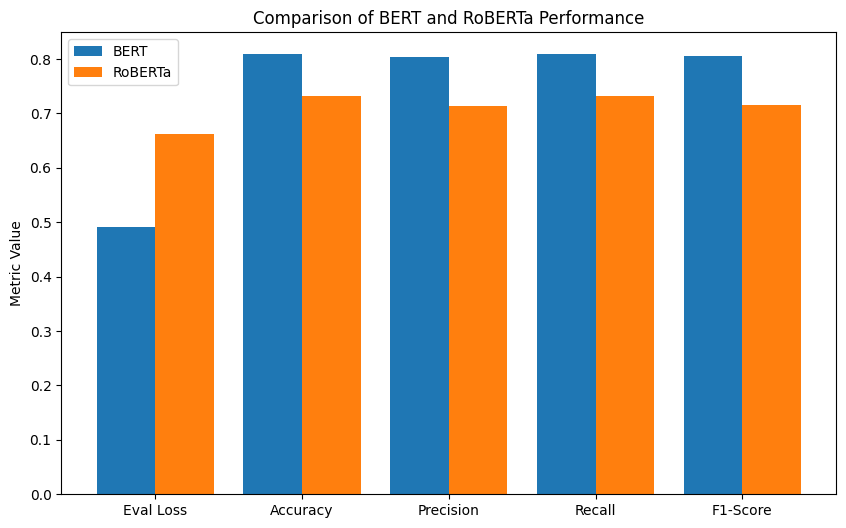

In [ ]:
import matplotlib.pyplot as plt

# Metrics for Visualization
metrics = ["Eval Loss", "Accuracy", "Precision", "Recall", "F1-Score"]
bert_values = [
    bert_results['eval_loss'],
    bert_results['eval_accuracy'],
    bert_results['eval_precision'],
    bert_results['eval_recall'],
    bert_results['eval_f1']
]
roberta_values = [
    roberta_results['eval_loss'],
    roberta_results['eval_accuracy'],
    roberta_results['eval_precision'],
    roberta_results['eval_recall'],
    roberta_results['eval_f1']
]

# Plot the metrics
x = range(len(metrics))
plt.figure(figsize=(10, 6))
plt.bar(x, bert_values, width=0.4, label="BERT", align="center")
plt.bar([p + 0.4 for p in x], roberta_values, width=0.4, label="RoBERTa", align="center")
plt.xticks([p + 0.2 for p in x], metrics)
plt.title("Comparison of BERT and RoBERTa Performance")
plt.ylabel("Metric Value")
plt.legend()
plt.show()


In [ ]:
import torch

# Check and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


In [ ]:
bert_model.to(device)  # Ensure the model is on the GPU


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
def predict_sentiment(text, model, tokenizer, max_len=128, device="cpu"):
    # Tokenize input text
    encoding = tokenizer(
        text,
        truncation=True,
        padding="max_length",
        max_length=max_len,
        return_tensors="pt"
    )

    # Move input tensors to the GPU
    input_ids = encoding["input_ids"].to(device)
    attention_mask = encoding["attention_mask"].to(device)

    # Make predictions
    model.eval()  # Ensure the model is in evaluation mode
    with torch.no_grad():  # No gradient computation
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        prediction = logits.argmax(dim=1).item()

    # Map prediction to sentiment label
    label_mapping = {0: "negative", 1: "neutral", 2: "positive"}
    return label_mapping[prediction]

# Example usage
text = "The flight experience was amazing, and the staff was very friendly."
predicted_sentiment = predict_sentiment(text, bert_model, tokenizer, device=device)
print(f"Predicted Sentiment: {predicted_sentiment}")


Predicted Sentiment: positive


In [ ]:
import torch.nn.functional as F

def predict_batch_with_threshold(texts, model, tokenizer, device="cpu", max_len=128, neutral_threshold=0.5):
    """
    Predict batch sentiments with a neutral confidence threshold.
    """
    model.eval()
    all_predictions = []

    for text in texts:
        # Tokenize each text
        encoding = tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=max_len,
            return_tensors="pt"
        )

        # Move tensors to the same device as the model
        input_ids = encoding["input_ids"].to(device)
        attention_mask = encoding["attention_mask"].to(device)

        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            probabilities = F.softmax(logits, dim=1)  # Convert logits to probabilities

            # Get the predicted class and its confidence
            prediction = logits.argmax(dim=1).item()
            confidence = probabilities[0][prediction].item()

            # Adjust prediction to neutral (1) if confidence is low
            if prediction != 1 and confidence < neutral_threshold:
                prediction = 1  # Override as neutral

            all_predictions.append(prediction)

    return all_predictions


In [ ]:
# Example texts for batch predictions
texts = [
    "The flight was delayed, but the staff was helpful.",  # Expected neutral
    "Terrible experience. The flight was cancelled.",      # Expected negative
    "The food was great, and the flight was on time."      # Expected positive
]

# Predict with confidence threshold
predictions = predict_batch_with_threshold(texts, bert_model, tokenizer, device=device)
print("Predictions:", predictions)

# Expected Output (adjusted with threshold):
# Predictions: [1, 0, 2]


Predictions: [1, 0, 2]


Classification Report:
              precision    recall  f1-score   support

    Negative       0.91      0.92      0.91      9178
     Neutral       0.72      0.69      0.71      3099
    Positive       0.82      0.79      0.81      2363

    accuracy                           0.85     14640
   macro avg       0.81      0.80      0.81     14640
weighted avg       0.85      0.85      0.85     14640



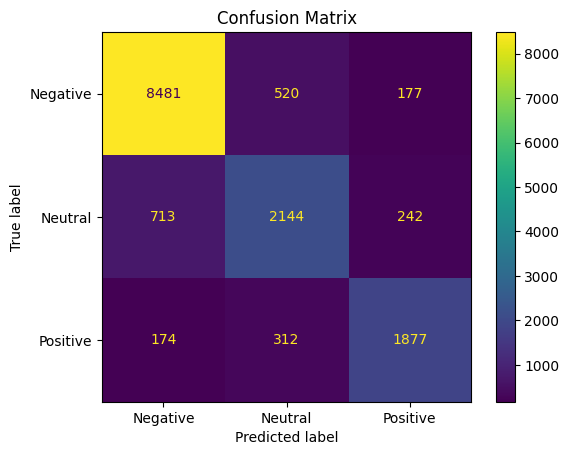

In [ ]:
# Predict sentiments for the entire test dataset
test_texts = data['cleaned_tweet'].tolist()  # Replace with your test dataset's text column
test_labels = data['sentiment_label'].tolist()  # Replace with the true labels

predictions = predict_batch_with_threshold(test_texts, bert_model, tokenizer, device=device)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Classification report
print("Classification Report:")
print(classification_report(test_labels, predictions, target_names=["Negative", "Neutral", "Positive"]))

# Confusion Matrix
cm = confusion_matrix(test_labels, predictions, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Neutral", "Positive"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()
